<a href="https://colab.research.google.com/github/rcarasek/Python-for-Investment/blob/main/PyForInvest_Colab_aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install git+https://github.com/quantopian/pyfolio

import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

In [48]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

In [49]:
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
dados_yahoo

In [ ]:
retorno = dados_yahoo.pct_change()
retorno

In [ ]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

In [53]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2016-05-04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2016-05-05,9765.304829,9891.892298,9711.933260,9574.711249,10053.226425,48997.068062,-0.020059
2016-05-06,9612.243593,9932.433758,9588.477249,9701.148843,9966.733932,48801.037375,-0.004001
2016-05-09,9637.755675,10067.568146,8724.279065,8752.873247,10066.531242,47249.007376,-0.031803
2016-05-10,9739.796124,10540.539460,9588.477249,9120.689025,10365.933907,49355.435765,0.044581
...,...,...,...,...,...,...,...
2021-04-28,8975.737634,20720.207097,97242.938173,78577.234417,68475.167592,273991.284912,0.001017
2021-04-29,9005.243787,20242.049219,97242.938173,78598.296078,66580.378432,271668.905689,-0.008476
2021-04-30,8816.404744,20084.944282,95800.245132,76541.189890,65679.876779,266922.660826,-0.017471


In [55]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

Start date,2016-05-04
End date,2021-05-04
Total months,59
,Backtest
Annual return,40.0%
Cumulative returns,425.0%
Annual volatility,31.6%
Sharpe ratio,1.23
Calmar ratio,0.98
Stability,0.85
Max drawdown,-41.0%


AttributeError: ignored

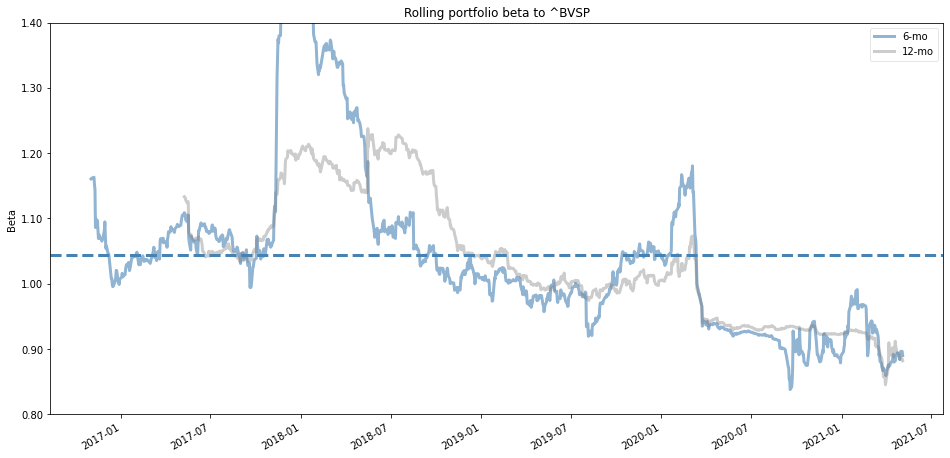

In [56]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));